# CS294-112 Deep Reinforcement Learning HW1 Warm-up

Yifat Amir

### Libraries

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import sklearn.utils as sku
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

### Hyperparameters

In [2]:
obs_file = "obs_Hopper-v1044909042017.npy"
act_file = "act_Hopper-v1044909042017.npy"
num_iters = 10000
batch_size = 200
learning_rate = 0.005
freq = 500

### Load the data

In [3]:
print('loading expert observations and actions')
obs = normalize(np.load(obs_file).astype(np.float32), axis = 0)
act = np.squeeze(np.load(act_file).astype(np.float32))

print obs.shape
print act.shape

loading expert observations and actions
(20000, 11)
(20000, 3)


### Building the Computational Graph

In [4]:
sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, shape=[None, 11])
y_ = tf.placeholder(tf.float32, shape=[None, 3])

W = tf.Variable(tf.zeros([11,3]))
b = tf.Variable(tf.zeros([3]))

sess.run(tf.global_variables_initializer())

y = tf.matmul(x,W) + b

l2 = tf.reduce_mean(tf.nn.l2_loss(y_ - y))

### Running the Computational Graph

In [5]:
list_of_losses = []
list_of_iters = []

train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(l2)
for i in range(num_iters):
    x_batch, y_batch = sku.shuffle(obs, act, n_samples = batch_size)
    a, loss = sess.run(fetches=[train_step, l2], feed_dict={x: x_batch, y_: y_batch})
    if i % freq == 0:
        list_of_losses.append(loss)
        list_of_iters.append(i)

### Plotting the Loss

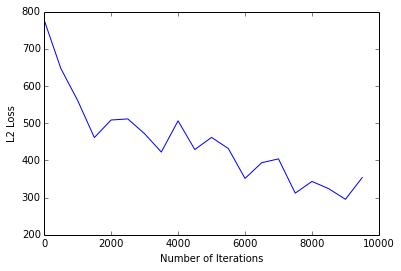

In [7]:
plt.plot(list_of_iters, list_of_losses)
plt.ylabel('L2 Loss')
plt.xlabel('Number of Iterations')
plt.show()